<a href="https://colab.research.google.com/github/Samuela31/Machine-Learning-Lab/blob/main/ML_Lab5_Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("weatherHistory.csv")

print(df)

          Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0   Partly Cloudy        rain         9.472222                  7.388889   
1   Partly Cloudy        rain         9.355556                  7.227778   
2   Mostly Cloudy        rain         9.377778                  9.377778   
3   Partly Cloudy        rain         8.288889                  5.944444   
4        Overcast         fog        11.250000                 11.250000   
5        Overcast        rain        11.183333                 11.183333   
6        Overcast        rain        10.694444                 10.694444   
7   Mostly Cloudy        rain        11.111111                 11.111111   
8   Mostly Cloudy        rain        11.111111                 11.111111   
9           Foggy        rain         8.177778                  4.372222   
10  Mostly Cloudy        rain         7.311111                  6.183333   
11       Overcast        rain         7.644444                  5.038889   
12  Partly C

In [ ]:
#for calculating linear regression coefficients a and b
x,y=df['Temperature (C)'], df['Wind Speed (km/h)']

#number of observations
n = len(x)

#summations
sx=np.sum(x)
sy=np.sum(y)
sxy=np.sum(y*x)
sxs=np.sum(x*x)

#calculating regression coefficients in y=ax+b
a = (n*sxy-sx*sy)/(n*sxs-sx*sx)
b = (sy*sxs -sx*sxy)/(n*sxs-sx*sx)

#estimating coefficients
coeff = (a, b)

print("Estimated regression coefficients:\na= {}\nb= {}".format(a, b))


Estimated regression coefficients:
a= -0.6976961779168792
b= 17.04547191333793


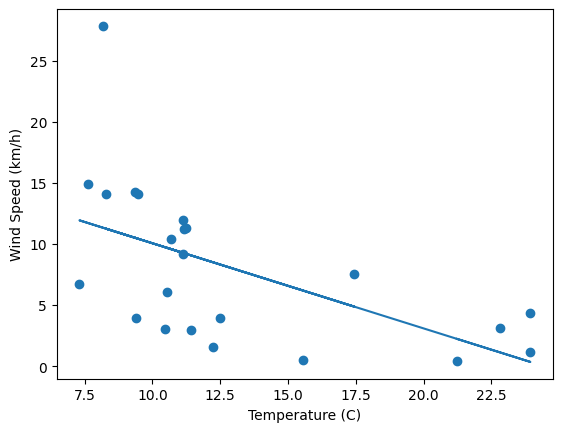

In [ ]:
#linear regression
import matplotlib.pyplot as plt

#plotting scatter plot
plt.scatter(x, y)

#plotting the regression line
y_line = a*x + b
plt.plot(x, y_line)

#putting labels and showing scatter plot
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

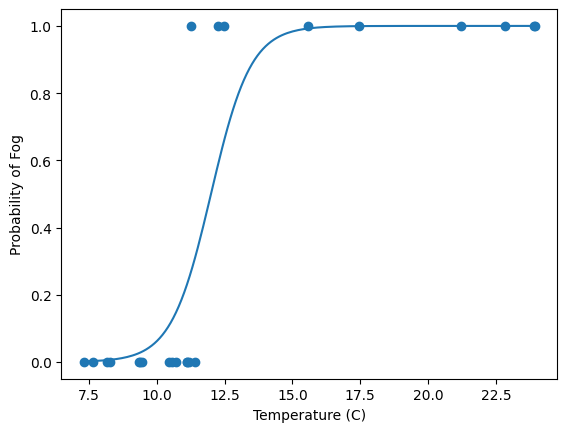

In [ ]:
#Logistic regression
#it is plotted between categorical variable Precip Type
#and numerical variable Temperature (categorical variable should
#be target value like yes or no etc, here it is 0 for rain, 1 for fog)
#Whether sigmoid curve comes depends on dataset, in this case rain occurs at
#lower temp and fog occurs at higher temp, so sigmoid curve is possible
#Sigmoid curve appears when the classes are well-separated and the predictor
#variable(temp) has a clear impact on the target variable(percip type)
#If classes overlap or the predictor variable has little impact on the target variable,
#the sigmoid curve will be less pronounced or may not appear at all, resulting in a straight line.
from sklearn.linear_model import LogisticRegression

#predictor variable X
#.values is used to convert dataframe into numpy array, otherwise it'll give error
X = df['Temperature (C)'].values
#target variable y (like yes or no, 0 or 1 etc)
Y = np.where(df['Precip Type'] == 'rain', 0, 1)

#perform logistic regression
logis = LogisticRegression()
#reshape() is used so that dimension of x and y is same
#-1 means any number of rows, 1 means 1 column
#since x and y are from same dataset they have same no. of rows
#both should have 1 column since when y is read it is read as a column with many rows
logis.fit(X.reshape(-1, 1), Y)

#plot logistic sigmoid curve
#We make an array of values ranging from min value of temp to
#max value in the dataset with a step size of 0.1 to generate
#a range of values used to plot sigmoid curve
X_range = np.arange(X.min(), X.max(), 0.1)
#slice operator is used to take all rows and 1st column only
#of predicted values since it predicts for both class 0(rain)
#and class 1(fog). Column 1 is fog. If 0 is given it'll take class 0
Y_prob = logis.predict_proba(X_range.reshape(-1, 1))[:, 1]
plt.plot(X_range, Y_prob)
plt.scatter(X, Y)
plt.xlabel('Temperature (C)')
plt.ylabel('Probability of Fog')
plt.show()


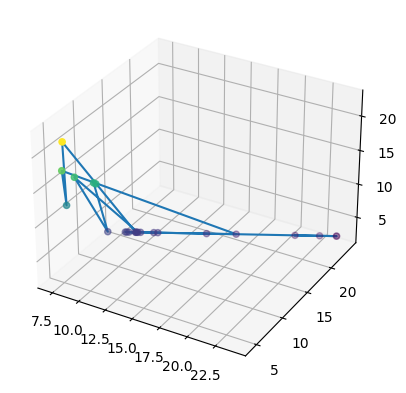

In [ ]:
#multi-linear regression
from sklearn import linear_model

I = df[['Temperature (C)', 'Apparent Temperature (C)']]
D = df['Wind Speed (km/h)']

reg = linear_model.LinearRegression()
reg.fit(I, D)

ax = plt.axes(projection ='3d')
ax.scatter3D(df['Temperature (C)'],  df['Apparent Temperature (C)'], reg.predict(I), c=reg.predict(I));
ax.plot3D(df['Temperature (C)'], df['Apparent Temperature (C)'], reg.predict(I))
plt.show()